# Practice

## Load Data

In [35]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')

In [4]:
data

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
5,92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
6,89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
7,195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
8,297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
9,264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


## Explore data

In [45]:
num_row = len(data)
x = data['CrimeRate'].values.reshape(num_row, 1)
y = data['HousePrice'].values.reshape(num_row, 1)

In [61]:
simple_model = linear_model.LinearRegression()
simple_model.fit(X=x, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

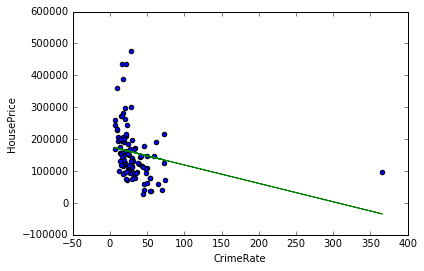

In [62]:
plt.figure()
data.plot.scatter(x='CrimeRate', y='HousePrice')
plt.plot(x, simple_model.predict(x), 'g-')

## Remove center city and redo regression(Outlier)

In [57]:
data_new = data[data['MilesPhila'] != 0.0]
num_row = len(data_new)
x_new = data_new['CrimeRate'].values.reshape(num_row, 1)
y_new = data_new['HousePrice'].values.reshape(num_row, 1)

In [59]:
new_model = linear_model.LinearRegression()
new_model.fit(X=x_new, y=y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

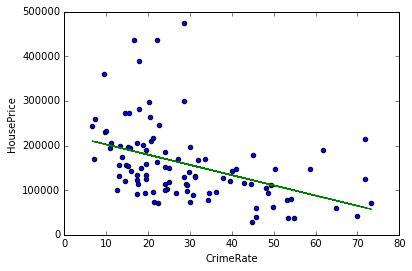

In [60]:
plt.figure()
data_new.plot.scatter(x='CrimeRate', y='HousePrice')
plt.plot(x_new, new_model.predict(x_new), 'g-')

## Compare coefficients of the two models

In [74]:
print 'simple linear model: \nintercept = ' + str(simple_model.intercept_[0])
print 'params = ' + str(simple_model.coef_[0][0])

simple linear model: 
intercept = 176629.408107
params = -576.908127682


In [75]:
print 'new linear model: \nintercept = ' + str(new_model.intercept_[0])
print 'params = ' + str(new_model.coef_[0][0])

new linear model: 
intercept = 225233.551839
params = -2288.68942995


## Remove high-priced house and see the effect

In [82]:
data_low = data_new[data_new['HousePrice'] < 350000]
num_row = len(data_low)
x_low = data_low['CrimeRate'].values.reshape(num_row, 1)
y_low = data_low['HousePrice'].values.reshape(num_row, 1)

In [83]:
low_model = linear_model.LinearRegression()
low_model.fit(X=x_low, y=y_low)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
print 'low linear model: \nintercept = ' + str(low_model.intercept_[0])
print 'params = ' + str(low_model.coef_[0][0])

low linear model: 
intercept = 199098.85267
params = -1838.56264859


In [89]:
280.76/0.092903

3022.076789769975